# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import seaborn as sns
from api_keys import api_key
from datetime import datetime

from urllib.request import urlopen


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [56]:
# This n determines how many cities we generate
# We also initialize our lists to track the cities

# I chose 700 because many cities will not have data available
# n=700 seemed safe in order to get above the 500 city threshold
n = 700
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [57]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=jamestown,SH
Processing record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=ushuaia,AR
Processing record 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=qaanaaq,GL
Processing record 4 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=narsaq,GL
Processing record 5 | broome
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=broome,AU
Processing record 6 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=marcona,PE
Processing record 7 | kawalu
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=kawa

Processing record 58 | harper
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=harper,LR
Processing record 59 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=kaitangata,NZ
Processing record 60 | lata
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=lata,SB
Processing record 61 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=moose factory,CA
Processing record 62 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=bethel,US
Processing record 63 | rayong
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=rayong,TH
Processing record 64 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units

Processing record 115 | porbandar
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=porbandar,IN
Processing record 116 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=beringovskiy,RU
Processing record 117 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=ahipara,NZ
Processing record 118 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=avarua,CK
Processing record 119 | kimbe
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=kimbe,PG
Processing record 120 | mae sot
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=mae sot,TH
Processing record 121 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff

Processing record 172 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=san quintin,MX
Processing record 173 | amalapuram
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=amalapuram,IN
Processing record 174 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=mount isa,AU
Processing record 175 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=baruun-urt,MN
Processing record 176 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=port elizabeth,ZA
Processing record 177 | avera
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=avera,PF
Processing record 178 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=4b28

Processing record 227 | genhe
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=genhe,CN
Processing record 228 | pakxe
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=pakxe,LA
Processing record 229 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=cape town,ZA
Processing record 230 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=longyearbyen,SJ
Processing record 231 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=sao joao da barra,BR
Processing record 232 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=sao filipe,CV
Processing record 233 | isiro
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235

Processing record 283 | woodway
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=woodway,US
Processing record 284 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=tiksi,RU
Processing record 285 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=saskylakh,RU
Processing record 286 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=wanning,CN
Processing record 287 | colomi
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=colomi,BO
Processing record 288 | mocuba
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=mocuba,MZ
Processing record 289 | ormara
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imper

Processing record 339 | barra do garcas
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=barra do garcas,BR
Processing record 340 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=tarko-sale,RU
Processing record 341 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=rio gallegos,AR
Processing record 342 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=rodrigues alves,BR
Processing record 343 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=hamilton,BM
Processing record 344 | carroll
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=carroll,US
Processing record 345 | misratah
http://api.openweathermap.org/data/2.5/we

Processing record 394 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=komsomolskiy,RU
Processing record 395 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=hervey bay,AU
Processing record 396 | harnosand
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=harnosand,SE
Processing record 397 | lahij
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=lahij,YE
Processing record 398 | bukachacha
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=bukachacha,RU
Processing record 399 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=shingu,JP
Processing record 400 | veraval
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad04

Processing record 449 | katherine
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=katherine,AU
Processing record 450 | artemovsk
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=artemovsk,UA
Processing record 451 | boyabat
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=boyabat,TR
Processing record 452 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=new norfolk,AU
Processing record 453 | baiyin
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=baiyin,CN
Processing record 454 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=hofn,IS
Processing record 455 | cortez
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd

Processing record 505 | molina
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=molina,CL
Processing record 506 | stephenville
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=stephenville,US
Processing record 507 | caborca
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=caborca,MX
Processing record 508 | villa guerrero
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=villa guerrero,MX
Processing record 509 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=inhambane,MZ
Processing record 510 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=clyde river,CA
Processing record 511 | salta
http://api.openweathermap.org/data/2.5/weather?appid=4b28a32

Processing record 561 | chake chake
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=chake chake,TZ
Processing record 562 | ranot
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=ranot,TH
Processing record 563 | tidore
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=tidore,ID
Processing record 564 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=vardo,NO
Processing record 565 | sinkat
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=sinkat,SD
Processing record 566 | taketoyo
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=taketoyo,JP
Processing record 567 | dongli
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imp

Processing record 617 | djambala
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=djambala,CG
Processing record 618 | ushtobe
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=ushtobe,KZ
Processing record 619 | igarka
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=igarka,RU
Processing record 620 | mallaig
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=mallaig,GB
Processing record 621 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=riyadh,SA
Processing record 622 | coos bay
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=coos bay,US
Processing record 623 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&u

Processing record 674 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=mehamn,NO
Processing record 675 | minas
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=minas,UY
Processing record 676 | huntsville
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=huntsville,CA
Processing record 677 | gejiu
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=gejiu,CN
Processing record 678 | burns lake
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=burns lake,CA
Processing record 679 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8d28fcd&units=imperial&q=krasnoselkup,RU
Processing record 680 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=4b28a3235580021ad0461ff3f8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 611 unique cities.


In [66]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,jamestown,-15.94,-5.72,100.0,68.00,0,13.69,1.539710e+09,SH
1,ushuaia,-54.81,-68.31,86.0,39.20,75,18.34,1.539706e+09,AR
2,qaanaaq,77.48,-69.36,100.0,14.81,76,6.98,1.539710e+09,GL
3,narsaq,60.91,-46.05,84.0,32.00,20,1.12,1.539709e+09,GL
4,broome,-17.97,122.23,94.0,69.80,0,8.99,1.539707e+09,AU


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

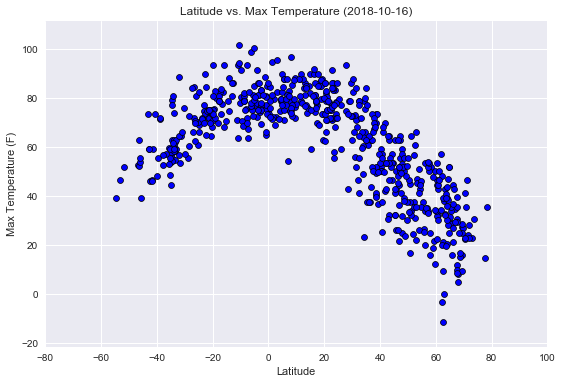

In [61]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

#### Latitude vs. Humidity Plot

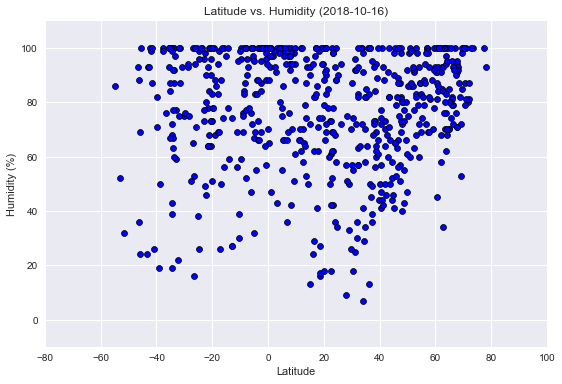

In [62]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Cloudiness Plot

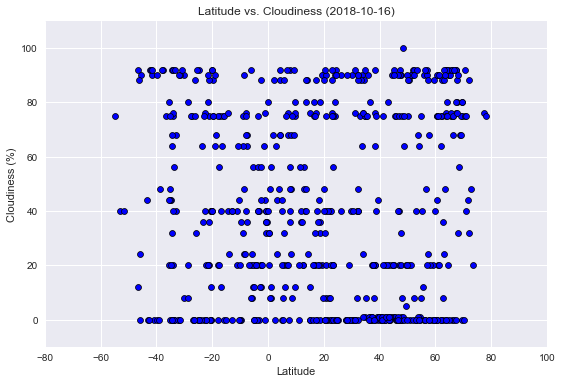

In [63]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Wind Speed Plot

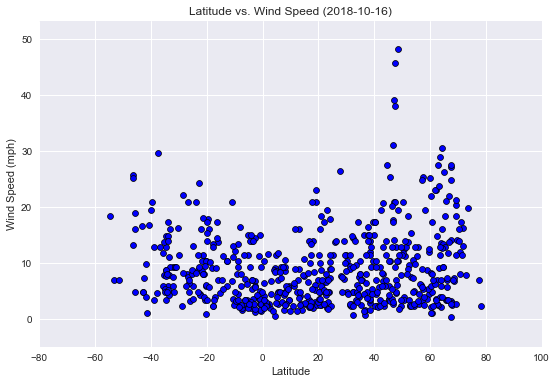

In [64]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()